<a href="https://colab.research.google.com/github/chiranjeevibmse/imdb_ml_assignment/blob/main/parta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd


In [45]:
df_title_basics  = pd.read_csv('title.basics.tsv', delimiter='\t')
print(df_title_basics.columns)

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')


In [46]:
df_name_basics = pd.read_csv('name.basics.tsv', delimiter='\t')
print(df_name_basics.columns)

Index(['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession',
       'knownForTitles'],
      dtype='object')


In [47]:
df_title_crew = pd.read_csv('title.crew.tsv', delimiter='\t')
print(df_title_crew.columns)

Index(['tconst', 'directors', 'writers'], dtype='object')


In [48]:
df_title_episode = pd.read_csv('title.episode.tsv', delimiter='\t')
print(df_title_episode.columns)

Index(['tconst', 'parentTconst', 'seasonNumber', 'episodeNumber'], dtype='object')


In [49]:
df_title_ratings = pd.read_csv('title.ratings.tsv', delimiter='\t')
print(df_title_ratings.columns)

Index(['tconst', 'averageRating', 'numVotes'], dtype='object')


In [50]:
imdb_df = df_title_basics.merge(df_title_ratings, on = 'tconst')
df_merged_directors = df_title_crew.merge(df_name_basics[['nconst', 'primaryName']], left_on='directors', right_on='nconst', how='left')
df_merged_directors.rename(columns={'primaryName': 'director_names'}, inplace=True)
df_merged_directors.drop(columns=['nconst'], inplace=True)
#df_merged_directors.head()
# Merge for 'writers'
df_merged_writers = df_title_crew.merge(df_name_basics[['nconst', 'primaryName']], left_on='writers', right_on='nconst', how='left')
df_merged_writers.rename(columns={'primaryName': 'writer_names'}, inplace=True)
df_merged_writers.drop(columns=['nconst'], inplace=True)

#df_merged_writers.head()

df_title_crew = df_title_crew.merge(df_merged_directors[['tconst', 'director_names']], on='tconst', how='left')
df_title_crew = df_title_crew.merge(df_merged_writers[['tconst', 'writer_names']], on='tconst', how='left')
df_title_crew.drop(columns=['directors','writers'], inplace=True)
#df_title_crew.head()
imdb_df = df_title_basics.merge(df_title_crew, on = 'tconst')
imdb_df.head()

,tconst,director_names,writer_names
0,tt0000001,William K.L. Dickson,NaN
1,tt0000002,NaN,NaN
2,tt0000003,NaN,NaN
3,tt0000004,NaN,NaN
4,tt0000005,William K.L. Dickson,NaN


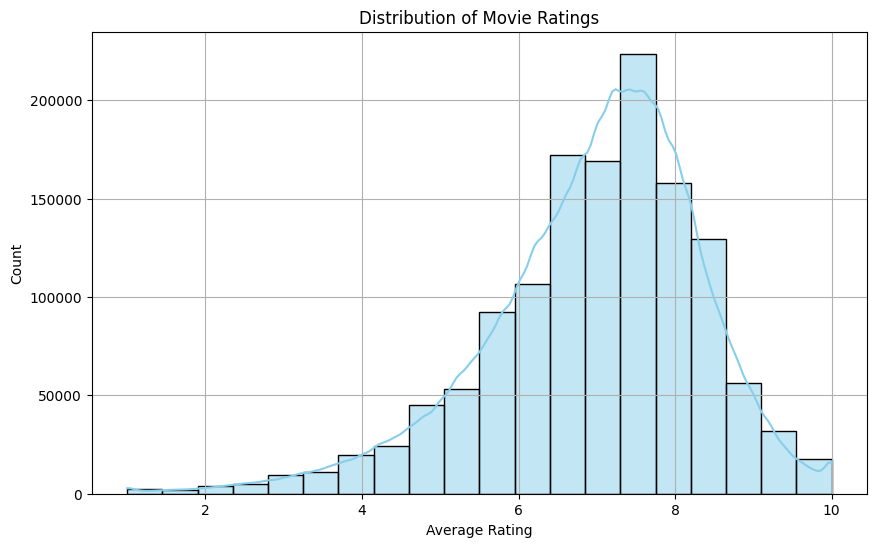

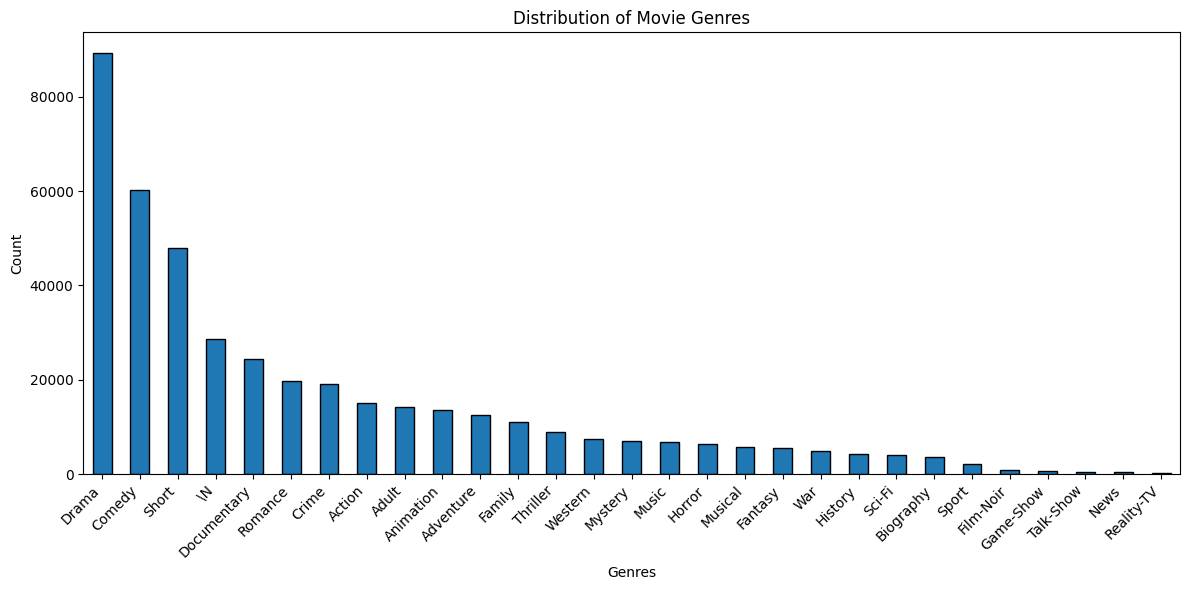

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df_title_ratings['averageRating'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings')
plt.grid(True)
plt.show()

genre_counts = df_title_basics['genres'].str.split(',').explode().value_counts()

# Plotting the histogram for movie genres
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

